Customer Segmentation using Clustering</center><a id='lib'></a></h1>

# 1. Introduction

The objective of analysis

* This type of data set requires customer segmentation to understand the customers beheviour to help a credit card company.

## 2. Customer Segmentation
* Customer segmentation is the process of segmenting a customer group into smaller groups in order to obtain a clear understanding of their unique needs and expectations. Customer segmentation is a method of analyzing the customer group in terms of differences and similarities within a customer group. These factors help you in offering tailor-made products or services to them and improve the retention rate of your existing customers as well.

In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as offline
offline.init_notebook_mode()

import warnings
warnings.filterwarnings ("ignore")

# 3. Loading the Dataset  

In [6]:
# Loading the dataset
data = pd.read_csv ("/content/drive/MyDrive/IITB Project/Customer Segmentation/Customer_Data.csv")
df = pd.DataFrame (data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONE_OFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40               0.00   
1     C10002  3202.467416           0.909091       0.00               0.00   
2     C10003  2495.148862           1.000000     773.17             773.17   
3     C10004  1666.670542           0.636364    1499.00            1499.00   
4     C10005   817.714335           1.000000      16.00              16.00   
...      ...          ...                ...        ...                ...   
8945  C19186    28.493517           1.000000     291.12               0.00   
8946  C19187    19.183215           1.000000     300.00               0.00   
8947  C19188    23.398673           0.833333     144.40               0.00   
8948  C19189    13.457564           0.833333       0.00               0.00   
8949  C19190   372.708075           0.666667    1093.25            1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
8945                     0.000000                          0.833333   
8946                     0.000000                          0.833333   
8947                     0.000000                          0.666667   
8948                     0.000000                          0.000000   
8949                     0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.59

Converting first characters of each word to uppercase and remaining to lowercase


In [7]:
# Conversion of first character
df.columns = [i.title() for i in df.columns]
df.columns

Index(['Cust_Id', 'Balance', 'Balance_Frequency', 'Purchases',
       'One_Off_Purchases', 'Installments_Purchases', 'Cash_Advance',
       'Purchases_Frequency', 'One_Off_Purchases_Frequency',
       'Purchases_Installments_Frequency', 'Cash_Advance_Frequency',
       'Cash_Advance_Trx', 'Purchases_Trx', 'Credit_Limit', 'Payments',
       'Minimum_Payments', 'Prc_Full_Payment', 'Tenure'],
      dtype='object')

Description of the dataset columns

The Dataset summarizes the behavior of 8950 credit card holders during the last 6 months and consists of 18 features.

Id | Features      | Description
--|:---------|:-----------
1|**Cust_Id:**      | Identification of credit card holder      
2|**Balance:**   | A credit card balance or Total amount left in their account to make purchases
3|**Balance_Frequency:**   | How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4|**Purchases:**    | Total amount of purchases made from account
5|**One_Off_Purchases:**   | Maximum purchase amount done in one-go
6|**Installments_Purchases:**    | Amount of purchase done in installment
7|**Cash_Advance:**    | Cash in advance given by the user
8|**Purchases_Frequency:**      | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9|**One_Off_Purchases_Frequency:**      | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)      
10|**Purchases_Installments_Frequency:**      | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
11|**Cash_Advance_Frequency:**      | How frequently the cash in advance being paid
12|**Cash_Advance_Trx:**      | Number of Transactions made with "Cash in Advanced"
13|**Purchases_Trx:**      | Number of purchase transactions made  
14|**Credit_Limit:**      | Limit of Credit Card for user  
15|**Payments:**      | Total amount of payments done by user  
16|**Minimum_Payments:**      | Minimum amount of payments made by user  
17|**Prc_Full_Payment:**      | Percentage of full payment paid by user  
18|**Tenure:**      | Tenure of credit card service for user  

The dataset has 18 features for each customer.

# 4. Data Preprocessing and EDA  <a class="anchor" id="data"></a></p>

Data Shape and information

In [8]:
# Data Shape and Information
print ("Shape of data: {}" . format (df.shape))
print ("Number of rows: {}" . format (df.shape [0]))
print ("Number of columns: {}" . format (df.shape [1]))

df.info ()

Shape of data: (8950, 18)
Number of rows: 8950
Number of columns: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cust_Id                           8950 non-null   object 
 1   Balance                           8950 non-null   float64
 2   Balance_Frequency                 8950 non-null   float64
 3   Purchases                         8950 non-null   float64
 4   One_Off_Purchases                 8950 non-null   float64
 5   Installments_Purchases            8950 non-null   float64
 6   Cash_Advance                      8950 non-null   float64
 7   Purchases_Frequency               8950 non-null   float64
 8   One_Off_Purchases_Frequency       8950 non-null   float64
 9   Purchases_Installments_Frequency  8950 non-null   float64
 10  Cash_Advance_Frequency            8950 non-null   float64
 11  

✅ **Observations:**
* The dataset contains 18 columns and 8950 rows, all non-null.
* "Cust_Id" dtype is object.
* "Cash_Advance_Trx", "Purchases_Trx", and "Tenure" dtypes are int64. The others are float64.  

In [9]:
# Dataset summary
df.describe (include = "all").T

count unique     top freq         mean  \
Cust_Id                             8950   8950  C10001    1          NaN   
Balance                           8950.0    NaN     NaN  NaN  1564.474828   
Balance_Frequency                 8950.0    NaN     NaN  NaN     0.877271   
Purchases                         8950.0    NaN     NaN  NaN  1003.204834   
One_Off_Purchases                 8950.0    NaN     NaN  NaN   592.437371   
Installments_Purchases            8950.0    NaN     NaN  NaN   411.067645   
Cash_Advance                      8950.0    NaN     NaN  NaN   978.871112   
Purchases_Frequency               8950.0    NaN     NaN  NaN     0.490351   
One_Off_Purchases_Frequency       8950.0    NaN     NaN  NaN     0.202458   
Purchases_Installments_Frequency  8950.0    NaN     NaN  NaN     0.364437   
Cash_Advance_Frequency            8950.0    NaN     NaN  NaN     0.135144   
Cash_Advance_Trx                  8950.0    NaN     NaN  NaN     3.248827   
Purchases_Trx                     8950.0    NaN     NaN  NaN    14.709832   
Credit_Limit                      8949.0    NaN     NaN  NaN   4494.44945   
Payments                          8950.0    NaN     NaN  NaN  1733.143852   
Minimum_Payments                  8637.0    NaN     NaN  NaN   864.206542   
Prc_Full_Payment                  8950.0    NaN     NaN  NaN     0.153715   
Tenure                            8950.0    NaN     NaN  NaN    11.517318   

                                          std       min         25%  \
Cust_Id                                   NaN       NaN         NaN   
Balance                           2081.531879       0.0  128.281915   
Balance_Frequency                    0.236904       0.0    0.888889   
Purchases                         2136.634782       0.0      39.635   
One_Off_Purchases                 1659.887917       0.0         0.0   
Installments_Purchases             904.338115       0.0         0.0   
Cash_Advance                      2097.163877       0.0         0.0   
Purchases_Frequency                  0.401371       0.0    0.083333   
One_Off_Purchases_Frequency          0.298336       0.0         0.0   
Purchases_Installments_Frequency     0.397448       0.0         0.0   
Cash_Advance_Frequency               0.200121       0.0         0.0   
Cash_Advance_Trx                     6.824647       0.0         0.0   
Purchases_Trx                       24.857649       0.0         1.0   
Credit_Limit                      3638.815725      50.0      1600.0   
Payments                          2895.063757       0.0  383.276166   
Minimum_Payments                  2372.446607  0.019163  169.123707   
Prc_Full_Payment                     0.292499       0.0         0.0   
Tenure                               1.338331       6.0        12.0   

                                         50%          75%          max  
Cust_Id                                  NaN          NaN          NaN  
Balance                           873.385231  2054.140036  19043.13856  
Balance_Frequency                        1.0          1.0          1.0  
Purchases                             361.28      1110.13     49039.57  
One_Off_Purchases                       38.0      577.405     40761.25  
Installments_Purchases                  89.0     468.6375      22500.0  
Cash_Advance                             0.0  1113.821139  47137.21176  
Purchases_Frequency                      0.5     0.916667          1.0  
One_Off_Purchases_Frequency         0.083333          0.3          1.0  
Purchases_Installments_Frequency    0.166667         0.75          1.0  
Cash_Advance_Frequency                   0.0     0.222222          1.5  
Cash_Advance_Trx                         0.0          4.0        123.0  
Purchases_Trx                            7.0         17.0        358.0  
Credit_Limit                          3000.0       6500.0      30000.0  
Payments                          856.901546  1901.134317  50721.48336  
Minimum_Payments                  312.343947   825.48

Duplicates values:

In [10]:
# Duplicate values
print ("Duplicate values in df are:" , df.duplicated ().sum ())

Duplicate values in df are: 0


Missing values:

In [11]:
# Missing Values
df.isnull ().sum ()

Cust_Id                               0
Balance                               0
Balance_Frequency                     0
Purchases                             0
One_Off_Purchases                     0
Installments_Purchases                0
Cash_Advance                          0
Purchases_Frequency                   0
One_Off_Purchases_Frequency           0
Purchases_Installments_Frequency      0
Cash_Advance_Frequency                0
Cash_Advance_Trx                      0
Purchases_Trx                         0
Credit_Limit                          1
Payments                              0
Minimum_Payments                    313
Prc_Full_Payment                      0
Tenure                                0
dtype: int64

✅ **Observations:**
* There is 313 missing values in "Minimum_Payments" and 1 missing value in "Credit_Limit".

Data cleaning

In [12]:
# Data Cleaning
df1 = df.copy ()

In [13]:
# Minimum payment
df_2 = (df1 [df1 ["Minimum_Payments"].isna() == True])
df_3 = (df_2 [df_2 ["Payments"] == 0])
df_3

Cust_Id      Balance  Balance_Frequency  Purchases  One_Off_Purchases  \
3     C10004  1666.670542           0.636364    1499.00            1499.00   
45    C10047  2242.311686           1.000000     437.00              97.00   
47    C10049  3910.111237           1.000000       0.00               0.00   
55    C10057  1311.995984           1.000000    1283.90            1283.90   
56    C10058  3625.218146           1.000000     313.27             313.27   
...      ...          ...                ...        ...                ...   
8854  C19095     3.833185           0.125000      45.00              45.00   
8919  C19160    14.524779           0.333333     152.00             152.00   
8929  C19170   371.527312           0.333333       0.00               0.00   
8935  C19176   183.817004           1.000000     465.90               0.00   
8944  C19185   193.571722           0.833333    1012.73            1012.73   

      Installments_Purchases  Cash_Advance  Purchases_Frequency  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
55                       0.0      0.000000             0.250000   
56                       0.0    668.468743             0.250000   
...                      ...           ...                  ...   
8854                     0.0      0.000000             0.125000   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   

      One_Off_Purchases_Frequency  Purchases_Installments_Frequency  \
3                        0.083333                          0.000000   
45                       0.083333                          0.333333   
47                       0.000000                          0.000000   
55                       0.250000                          0.000000   
56                       0.250000                          0.000000   
...                           ...                               ...   
8854                     0.125000                          0.000000   
8919                     0.333333                          0.000000   
8929                     0.000000                          0.000000   
8935                     0.000000                          0.833333   
8944                     0.333333                          0.000000   

      Cash_Advance_Frequency  Cash_Advance_Trx  Purchases_Trx  Credit_Limit  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
55                  0.000000                 0              6        6000.0   
56                  0.416667                 5              4        4000.0   
...                      ...               ...            ...           ...   
8854                0.000000                 0              1         500.0   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   

      Payments  Minimum_Payments  Prc_Full_Payment  Tenure  
3          0.0               NaN               0.0      12  
45         0.0               NaN               0.0      12  
47         0.0               NaN               0.0      12  
55         0.0               NaN               0.0      12  
56         0.0               NaN               0.0      12  
...        ...               ...               ...     ...  
8854       0.0               NaN  

In 240 raws of df1, "Minimum_Payments" is NaN and "Payments" is 0, at the same time. If we do not have any "Payments" in our bank account, our "Minimum_Payments" is also zero. Therefore, we can replace these missing values with 0. for doing this we creat a loop.

In [14]:
# Find Minimum payment
Minimum_Payments = df1 ["Minimum_Payments"]
i = 0
for payments, minimum_payments in zip (df1 ["Payments"] , df1 ["Minimum_Payments"].isna()):
    if (payments == 0) and (minimum_payments == True):
        Minimum_Payments [i] = 0
    elif (payments > 0) and (minimum_payments == True):
        Minimum_Payments [i] = Minimum_Payments [i]
    i += 1

df1 ["Minimum_Payments"] = Minimum_Payments

In [15]:
# mising values for Minimum payment
df1.isnull ().sum ()

Cust_Id                              0
Balance                              0
Balance_Frequency                    0
Purchases                            0
One_Off_Purchases                    0
Installments_Purchases               0
Cash_Advance                         0
Purchases_Frequency                  0
One_Off_Purchases_Frequency          0
Purchases_Installments_Frequency     0
Cash_Advance_Frequency               0
Cash_Advance_Trx                     0
Purchases_Trx                        0
Credit_Limit                         1
Payments                             0
Minimum_Payments                    73
Prc_Full_Payment                     0
Tenure                               0
dtype: int64

Now, we just have 73 missing values in "Minimum_Payments".

In [16]:
#Missing values percetnage calculation
Missing_values_percentange = 100 * df1["Credit_Limit"].isnull().sum()/len(df1)
print ("Missing values percentange for 'Credit_Limit' is:" , Missing_values_percentange)
Missing_values_percentange = 100 * df1["Minimum_Payments"].isnull().sum()/len(df1)
print ("Missing values percentange for 'Minimum_Payments' is:" , Missing_values_percentange)

Missing values percentange for 'Credit_Limit' is: 0.0111731843575419
Missing values percentange for 'Minimum_Payments' is: 0.8156424581005587


The number of missing values in comparison to the total number of data is small. Moreover, the percentange of missing values is only 0.82 % or 1 % for 'Minimum_Payments' and 0 % for 'Credit_Limit. Therefore I simply remove them from the dataset.

In [17]:
# Drop the missing values
df1.dropna (inplace = True)
df1.drop (['Cust_Id'], axis=1, inplace = True)
df1
df1.isnull ().sum ()

Balance                             0
Balance_Frequency                   0
Purchases                           0
One_Off_Purchases                   0
Installments_Purchases              0
Cash_Advance                        0
Purchases_Frequency                 0
One_Off_Purchases_Frequency         0
Purchases_Installments_Frequency    0
Cash_Advance_Frequency              0
Cash_Advance_Trx                    0
Purchases_Trx                       0
Credit_Limit                        0
Payments                            0
Minimum_Payments                    0
Prc_Full_Payment                    0
Tenure                              0
dtype: int64

The 'Cust_Id' has no effect on modeling, so I remove it from the dataset.

Now, we do not have any missing values.

Unique categories of categorical variables

In [18]:
# Unique catagories of values
print (df1 ['Tenure'].unique ())

[12  8 11  9 10  6  7]


<Axes: ylabel='count'>

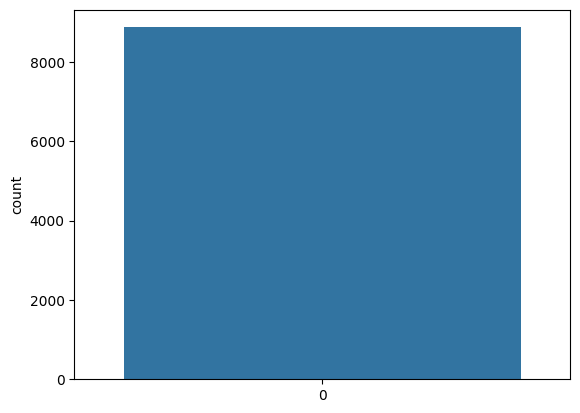

In [19]:
# Count map
sns.countplot  ( df1 ['Tenure'])

Correlation

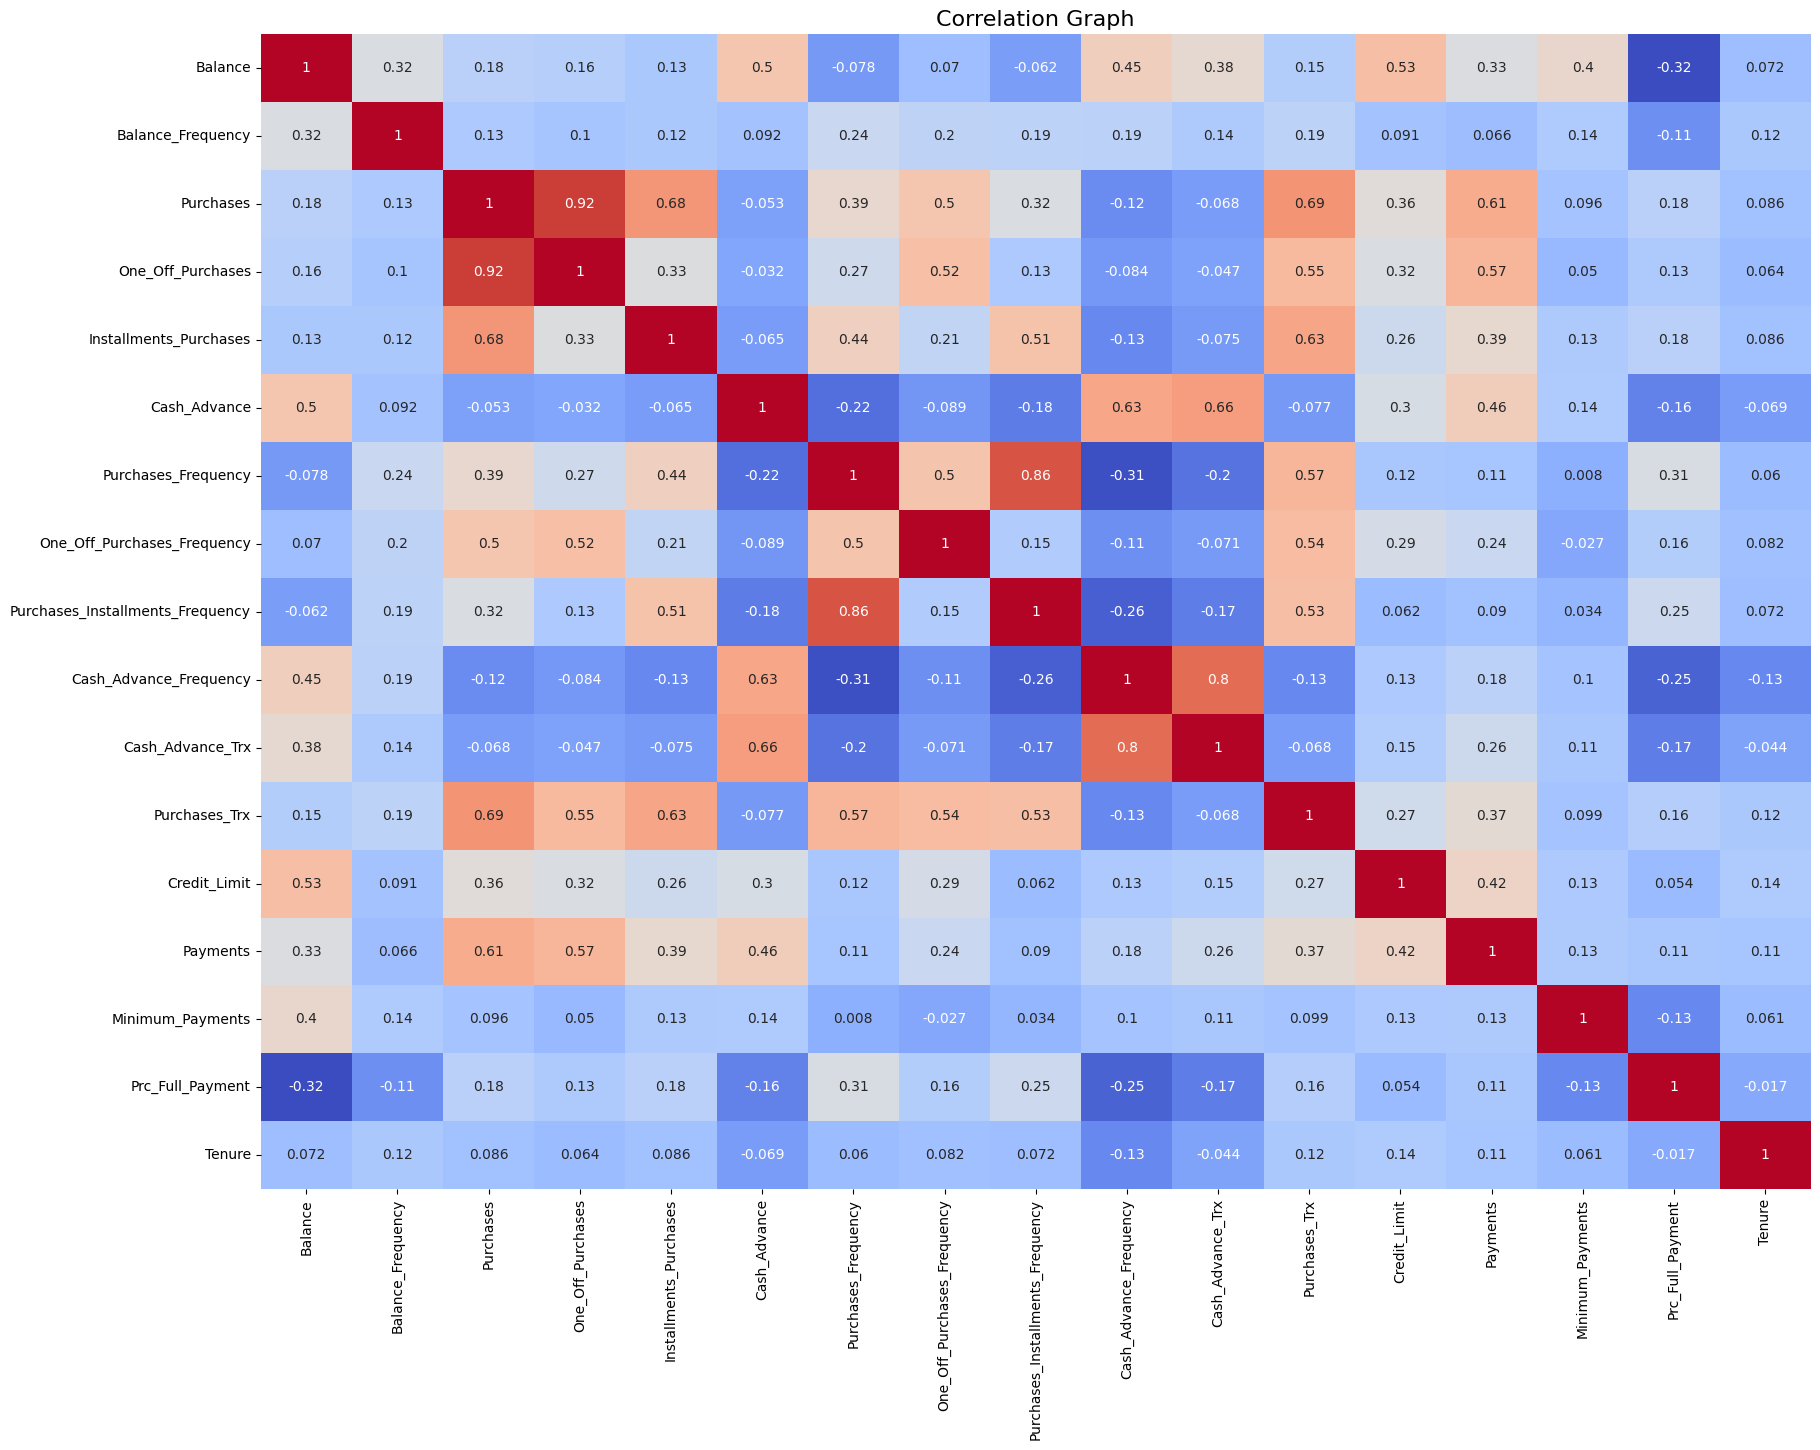

In [20]:
# Correlation Graph
plt.figure (figsize = [20,15] ,  dpi = 100 )
plt.title ("Correlation Graph" , fontsize = 16)
sns.heatmap (df1.corr(), annot = True, cmap = 'coolwarm', cbar = False)
plt.show ()

✅ **Observations:**

* The first highest positive correlation is related to "One_Off_Purchases" and "Purchases" (Correlation of 0.92).
* The second highest positive correlation is related to "Purchases_Installments_Frequency" and "Purchases_Frequency" (0.86).
* The third highest positive correlation is related to "Cash_Advance_Trx" and "Cash_Advance_Frequency" (0.8).
* The correlation between "Purchases_Trx" and "Purchases" is 69%.
* The correlation between "Installments_Purchases" and "Purchases" is 68%.
* The correlation between "Cash_Advance" and "Cash_Advance_Trx" is 66%.
* The correlation between "Cash_Advance" and "Cash_Advance_Frequency" is 63%.
* The correlation between "Purchases_Trx" and "Installments_Purchases" is 63%.
* The correlation between "Purchases" and "Payments" is 61%.

Visualization

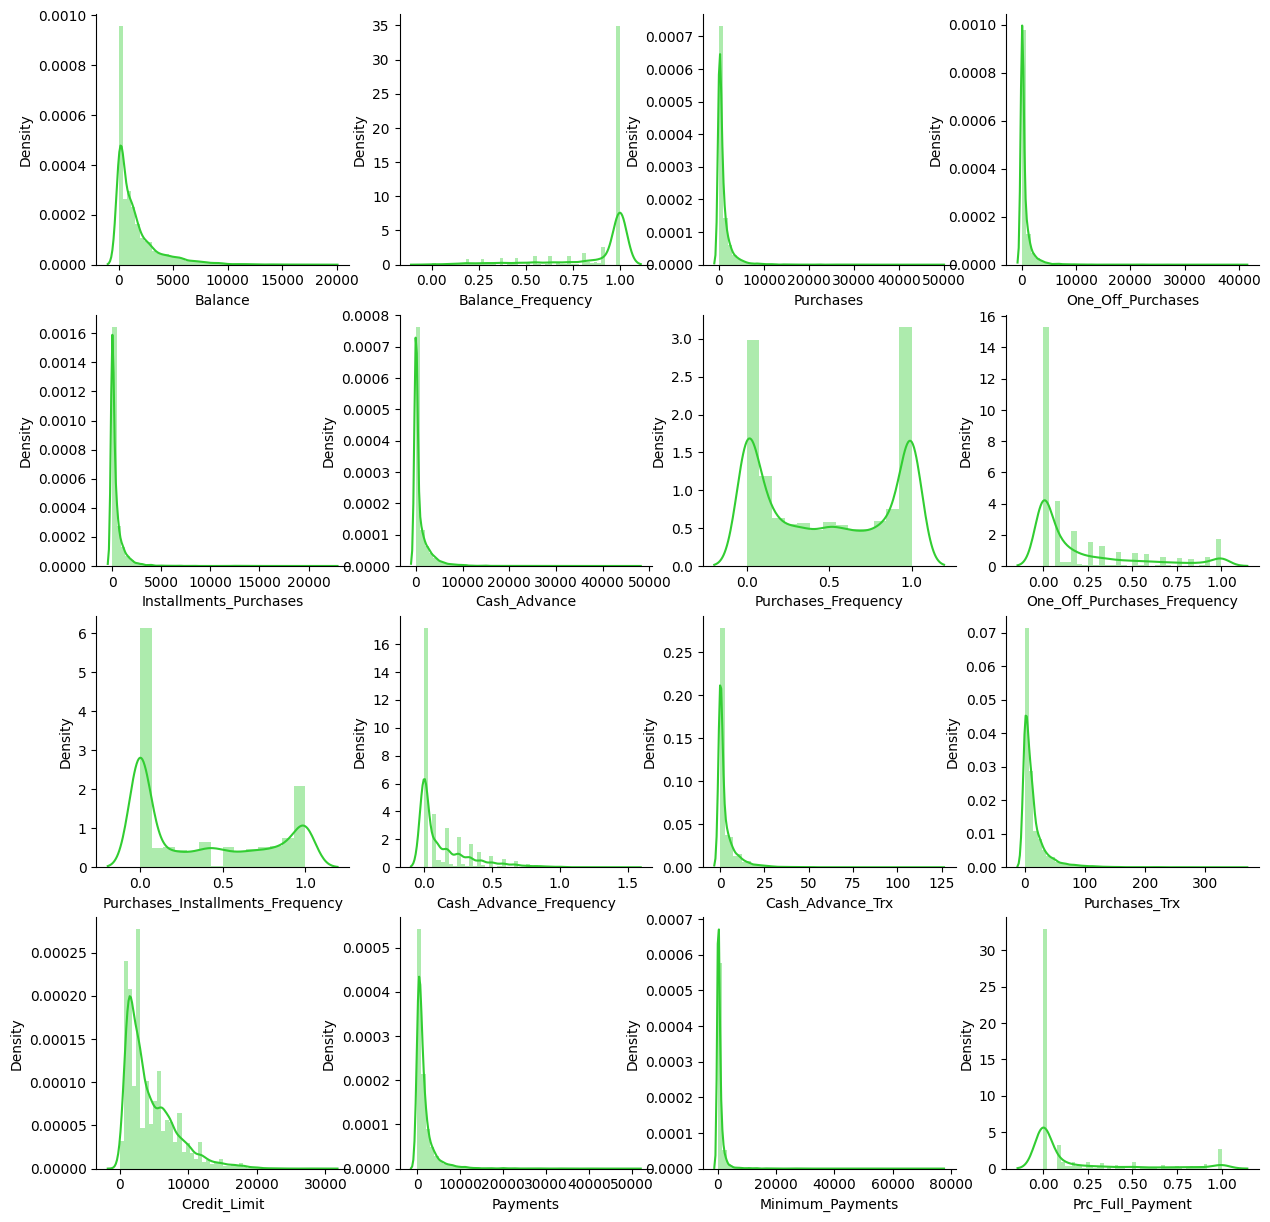

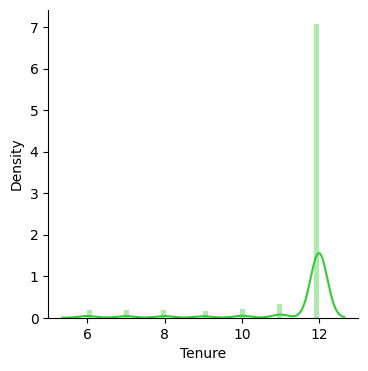

In [21]:
# Visualisation
fig, axs = plt.subplots (nrows = 4 , ncols = 4 , figsize = (15 , 15));
for i in range (4):
    for j in range (4):
        sns.distplot (df1 [df1.columns [4 * i + j]] , color = "LimeGreen" , ax = axs [i,j]);
        sns.despine ();
plt.show ();
fig, axs = plt.subplots (nrows = 1 , ncols = 1, figsize = (4,4));
sns.distplot (df1.Tenure , color = "LimeGreen" , ax = axs);
sns.despine ();
plt.show ();

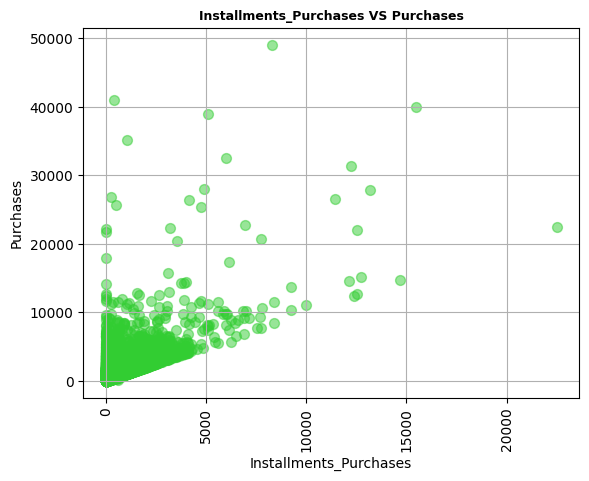

In [22]:
# Scatterplot for the data visualised
plt.scatter (df1["Installments_Purchases"] , df1["Purchases"] ,color = "LimeGreen" , s = 50, alpha = 0.5)
plt.xticks (rotation = 90)
plt.title ("Installments_Purchases VS Purchases" , weight = "bold" , color = "black" , fontsize = 9)
plt.xlabel ("Installments_Purchases"  , color = "black")
plt.ylabel ("Purchases" , color = "black")
plt.grid ()
plt.show ()

# 5. Clustering Methods

Normalization (Standardization):

In [23]:
# Normalisation and Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaled_features = scaler.fit_transform (df1)

5.1. KMeans Clustering  <a class="anchor" id="kmeans"></a></p>



1.   List item
2.   List item


In [24]:
# K-Means Clustering
from sklearn.cluster import KMeans

kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

List = []
for k in range (1, 11):
    kmeans = KMeans (n_clusters = k, **kmeans_set) # ** opens the dictionary
    kmeans.fit (scaled_features)
    List.append (kmeans.inertia_)

In [25]:
# Installation of necessary modules
!pip install kneed

In [26]:
from kneed import KneeLocator
k1 = KneeLocator (range (1, 11), List, curve = "convex", direction = "decreasing")
k1.elbow

4

k = 4 is better.

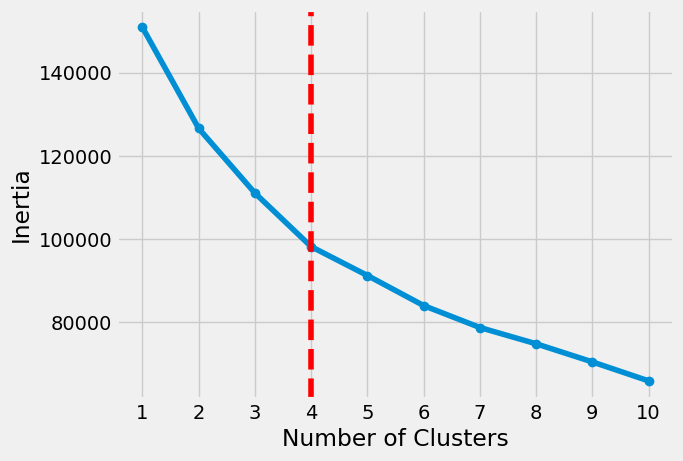

In [27]:
# Grph plotting for Inertia vs No of clusters
plt.style.use ("fivethirtyeight")
plt.plot (range (1,11), List , marker = 'o')
plt.xticks (range (1, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
# axvline = ax vertical line
plt.axvline (x = k1.elbow, color = "red", label = "axvline - full height",linewidth = 4, linestyle ="--")
plt.show ()

<span style="color:blue;font-weight:700;font-size:15px">
     We deduce that by using the elbow method k = 4 is better.
</span>

Finding the number of clusters using the silhouette method

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

* 1: Means clusters are well apart from each other and clearly distinguished.
* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* -1: Means clusters are assigned in the wrong way.
* Higher values of silhouette score are better.

In [28]:
# Check for silhouette coefficient
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans (n_clusters = k, **kmeans_set)
    kmeans.fit (scaled_features)
    score = silhouette_score (scaled_features, kmeans.labels_)
    silhouette_coefficients.append (score)

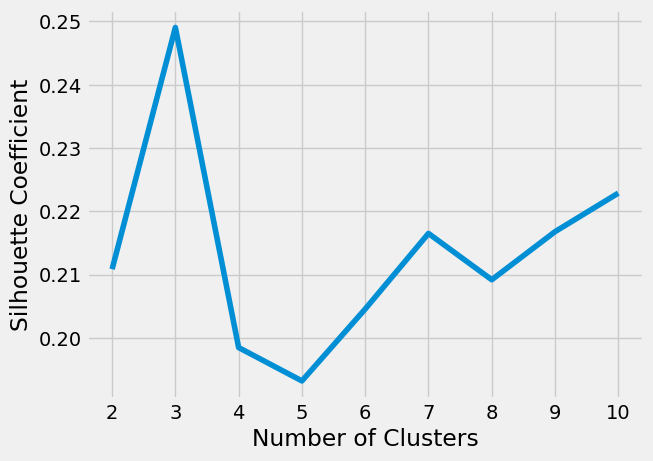

In [29]:
# Plotting the results:
plt.style.use ("fivethirtyeight")
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.show ()

<span style="color:blue;font-weight:700;font-size:15px">
     We deduce that by using the silhouette method k = 3 is better.
</span>

In [30]:
# Applying K-means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 3)
kmeans = kmeans.fit (df1)

centroids = kmeans.cluster_centers_
print (centroids)

labels = kmeans.labels_
print (labels)

[[8.68924497e+02 8.62462031e-01 6.12401921e+02 3.18823835e+02
  2.93878114e+02 5.03429292e+02 4.67734236e-01 1.56378670e-01
  3.51279950e-01 1.07818797e-01 2.28498845e+00 1.07685912e+01
  2.76984967e+03 1.00410091e+03 5.55153043e+02 1.58933840e-01
  1.14380293e+01]
 [3.43188656e+03 9.42033663e-01 1.58847631e+03 9.91607682e+02
  5.97186550e+02 2.13976326e+03 5.39995770e-01 3.17614052e-01
  3.85654436e-01 2.12564192e-01 5.78596803e+00 2.22246892e+01
  9.05568585e+03 2.91435345e+03 1.56853130e+03 1.33210115e-01
  1.17349023e+01]
 [4.87916214e+03 9.17611326e-01 1.08536936e+04 7.65950163e+03
  3.19436248e+03 5.19215982e+03 7.57564000e-01 6.03537062e-01
  6.08805682e-01 2.28296233e-01 9.27131783e+00 8.68604651e+01
  1.24848837e+04 1.80309572e+04 2.52779839e+03 3.37066930e-01
  1.18372093e+01]]
[0 1 1 ... 0 0 0]


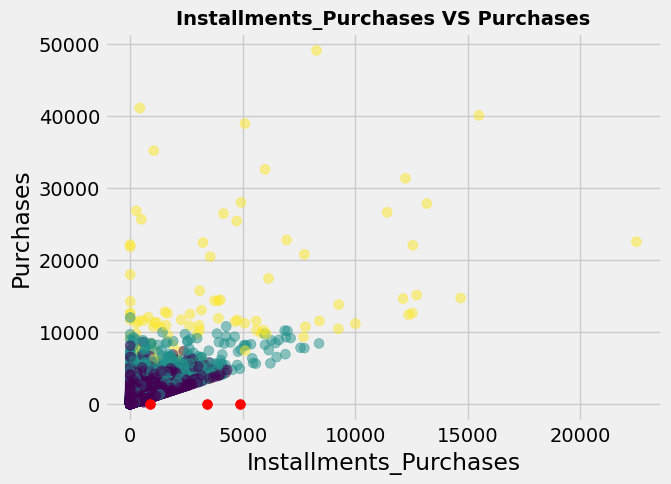

In [31]:
# Plotting of results
plt.scatter (df1["Installments_Purchases"] , df1["Purchases"] , c = kmeans.labels_.astype (float), s = 50, alpha = 0.5)
plt.scatter (centroids [:, 0], centroids [:, 1], c = "red", s = 50)
plt.title ("Installments_Purchases VS Purchases" , weight = "bold" , color = "black" , fontsize = 14)
plt.xlabel ("Installments_Purchases"  , color = "black")
plt.ylabel ("Purchases" , color = "black")
plt.grid (True)
plt.show ()

[0 1 1 ... 0 0 0]


<Axes: ylabel='count'>

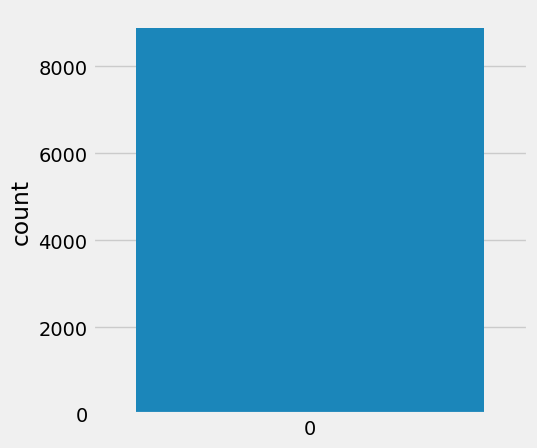

In [32]:
df2 = df1.copy ()
df2 ["Labels"] = kmeans.labels_
df2

cluster = kmeans.labels_
print (cluster)

df2.Labels.value_counts ()

plt.figure (figsize = (5 , 5))
sns.countplot (df2 ["Labels"])

KMeans Clustering performance evaluation

In [33]:
#Clustering performance evaluation

#Set number of clusters at initialisation time
k_means = KMeans (n_clusters = 3)

#Run the clustering algorithm
model = k_means.fit (scaled_features)
model

#Generate cluster predictions and store in
y_hat = k_means.predict (scaled_features)

In [34]:
# Calculation of scores
from sklearn import metrics

labels = k_means.labels_
print ("Silhouette score is :" , metrics.silhouette_score (scaled_features, labels, metric = 'euclidean'))
print ("Calinski-Harabasz score is :" , metrics.calinski_harabasz_score (scaled_features, labels))
print ("Davies-Bouldin score is :" , metrics.davies_bouldin_score(scaled_features, labels))

Silhouette score is : 0.24910334861870256
Calinski-Harabasz score is : 1591.2996714674648
Davies-Bouldin score is : 1.5992415710838115


 Davies-Bouldin score
* The minimum score is zero and lower values indicating better clustering.

5.1.1. Exploring the characteristics of each cluster <a class="anchor" id="exploring"></a></p>

Text(0, 0.5, 'Payments')

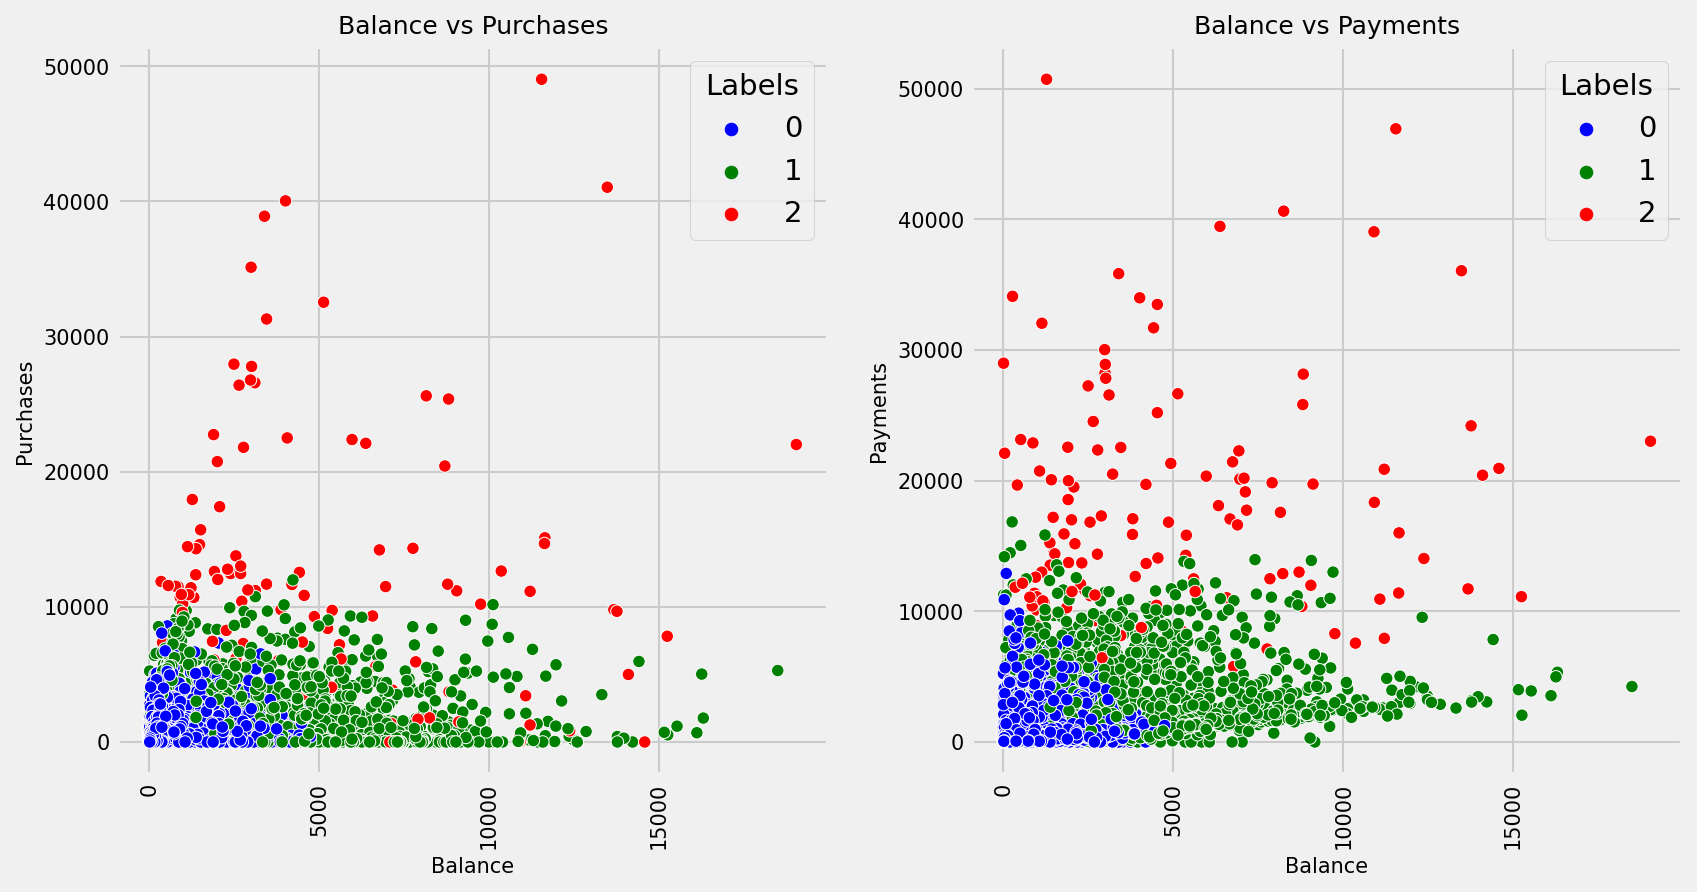

In [35]:

fig = plt.figure (figsize = (12 , 6) , dpi = 150)

plt.subplot (1 , 2 , 1)
sns.scatterplot (x = df2 ['Balance'] ,y = df2 ['Purchases'] , hue = df2 ['Labels'] , palette=['blue','green','red'])
plt.title('Balance vs Purchases' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Balance' , fontsize=10)
plt.ylabel ('Purchases' , fontsize=10)


plt.subplot (1 , 2 , 2)
sns.scatterplot (x = df2 ['Balance'] , y= df2 ['Payments'] , hue = df2 ['Labels'] , palette = ['blue','green','red'])
plt.title('Balance vs Payments' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Balance' , fontsize=10)
plt.ylabel ('Payments' , fontsize=10)

* Group 0: These group of customers have the lowest "Purchases" and "Payments". They have momey, but they are not spenders.
* Group 1: These group of customers have the lowest "Balance", "Purchases", and "Payments". They do not have much money to spend.
* Group 2: These group of customers have the highest "Purchases" and "Payments". They are spenders.

Text(0, 0.5, 'Purchases')

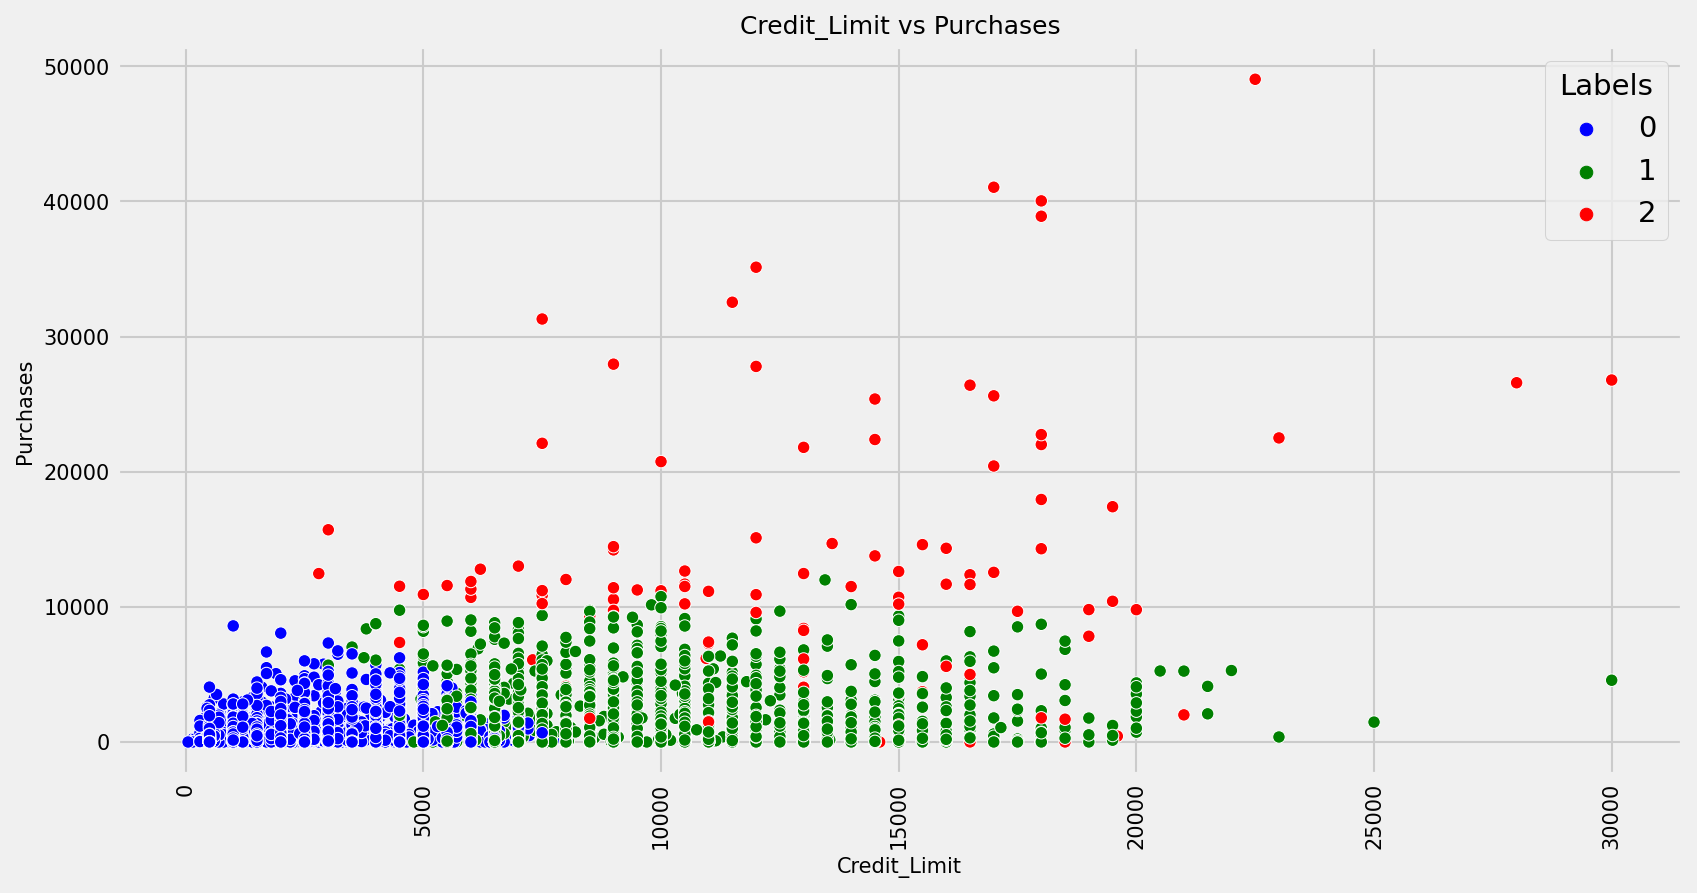

In [36]:

fig = plt.figure (figsize = (12 , 6) , dpi = 150)

sns.scatterplot ( x = df2 ['Credit_Limit'] , y = df2 ['Purchases'] , hue = df2 ['Labels'] , palette=['blue','green','red'])
plt.title('Credit_Limit vs Purchases' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Credit_Limit' , fontsize=10)
plt.ylabel ('Purchases' , fontsize=10)

* Group 0: These group of customers have a good credit limit, but the lowest "Purchases".
* Group 1: These group of customers have the lowest "Credit_Limit" and "Purchases".
* Group 2: These group of customers have a good credit limit and they spend their money.

5.2. Principal Component Analysis (PCA)  <a class="anchor" id="pca"></a></p>

Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [37]:
# Principal Component Analysis
from sklearn.decomposition import PCA
X = scaled_features
pca = PCA ()
pca.fit_transform (X)

pca.explained_variance_ratio_

pca.explained_variance_ratio_.shape

(17,)

Text(0, 0.5, 'Percentage of Explained Variance Ratio')

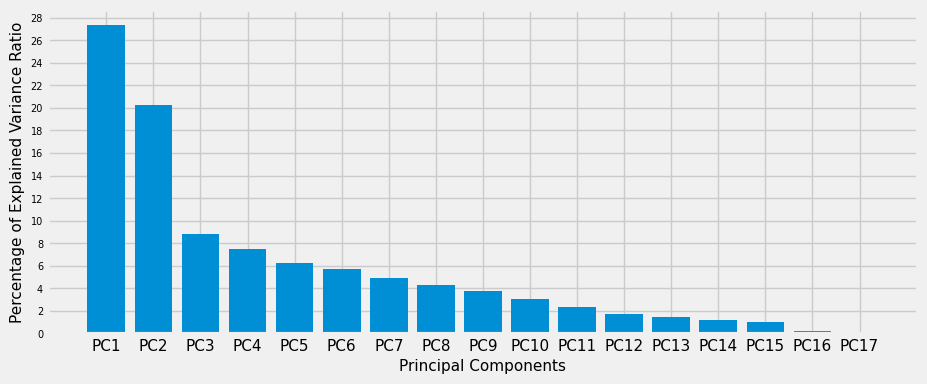

In [38]:
# Plotting graph for PCA
from matplotlib import pyplot as plt
pca.explained_variance_
pca.explained_variance_ratio_

plt.figure (figsize = (10 , 4), dpi = 100)

plt.bar(range (17),(pca.explained_variance_ratio_)*100,tick_label=["PC" + str(x) for x in range(1,18)])

plt.xticks (fontsize = 11)
plt.yticks (range (0 , 30 , 2) , fontsize=7)

plt.xlabel('Principal Components' , size = 11)
plt.ylabel('Percentage of Explained Variance Ratio', size = 11)

 PCA with 2 dimensions


In [39]:
# PCA with 2 dimensions
from sklearn.decomposition import PCA
X = scaled_features
pca_2 = PCA (n_components = 2)
pca_2.fit_transform (X)

array([[-1.68652225, -1.08898463],
       [-1.15034795,  2.48774737],
       [ 0.96179553, -0.3933702 ],
       ...,
       [-0.92731176, -1.82064418],
       [-2.34342675, -0.67863784],
       [-0.57303471, -0.42164204]])

<BarContainer object of 2 artists>

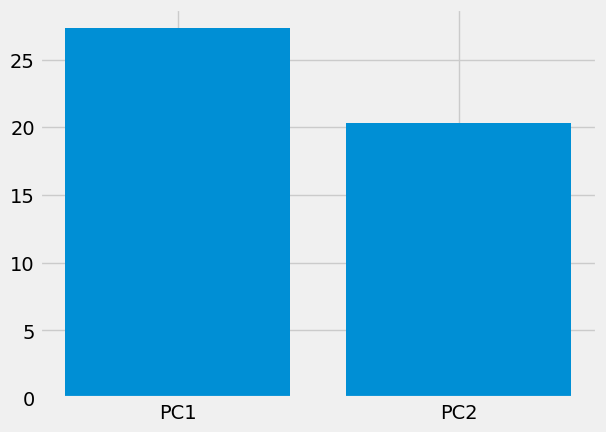

In [40]:
# PCA
from matplotlib import pyplot as plt
pca_2.explained_variance_
pca_2.explained_variance_ratio_
plt.bar (range (2) , (pca_2.explained_variance_ratio_)*100 , tick_label = ["PC" + str(x) for x in range(1 , 3)])

(8876, 2)

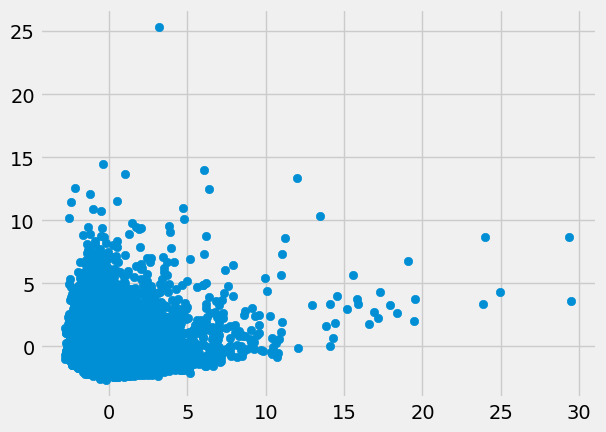

In [41]:
# @title
from matplotlib import pyplot as plt
pca_2.explained_variance_
pca_2.explained_variance_ratio_
Z = pca_2.transform (X)
Z.shape
plt.scatter (Z [: , 0] , Z [: , 1])

pca_2 = pca_2.fit_transform (X)
pca_2.shape

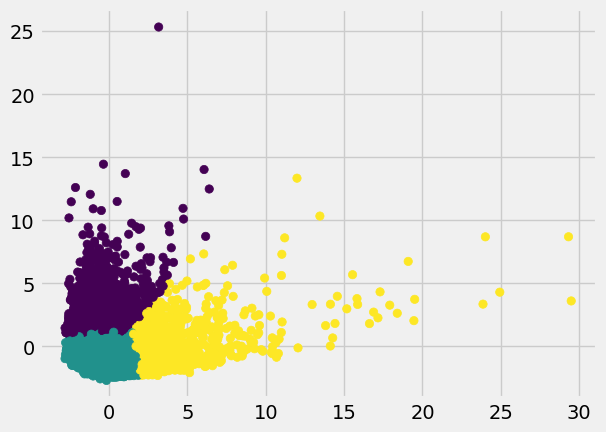

<Axes: xlabel='PC1', ylabel='PC2'>

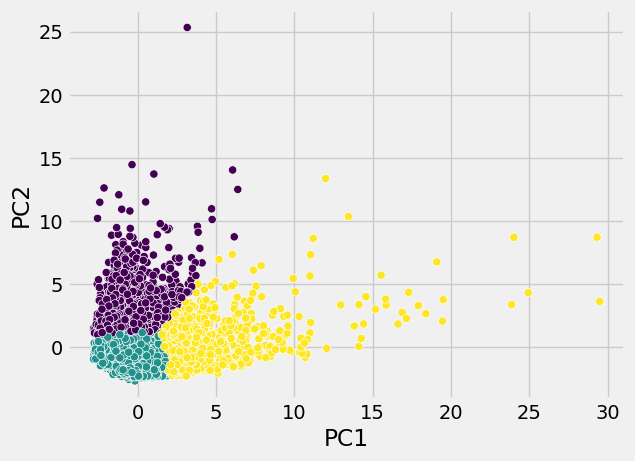

In [42]:
# Create 2 column for 2 dimension
pca_2_df = pd.DataFrame(pca_2)
pca_2_df.columns = ["PC1" , "PC2"]
pca_2_df

plt.scatter (pca_2_df ["PC1"] , pca_2_df ["PC2"],
            c = KMeans (n_clusters = 3).fit_predict (pca_2_df) , cmap = None)
plt.show ()

sns.scatterplot (x = pca_2_df ["PC1"] , y = pca_2_df ["PC2"],
            c = KMeans (n_clusters = 3).fit_predict (pca_2_df), cmap = None)

PCA with 3 dimensions

In [43]:
# PCA with 3 dimension
pca_3 = PCA (n_components = 3).fit (X)

pca_3 = pca_3.fit_transform (X)

pca_3_df = pd.DataFrame (pca_3)
pca_3_df.columns = ["PC1" , "PC2" , "PC3"]
pca_3_df.head()

PC1       PC2       PC3
0 -1.686520 -1.088974  0.459292
1 -1.150332  2.487792  0.621987
2  0.961780 -0.393433  0.039596
3 -0.913554 -0.036994  1.533904
4 -1.600295 -0.699566  0.295246

In [44]:
# Plotting results
import plotly.express as px

fig = px.scatter_3d (pca_3_df , x = pca_3_df ['PC1'] , y = pca_3_df ['PC2'], z = pca_3_df ['PC3'],
                    color = KMeans (n_clusters = 3).fit_predict (pca_2_df))
fig.show()

Finding the number of components for PCA

Text(9, 0.7, 'number of components: 8')

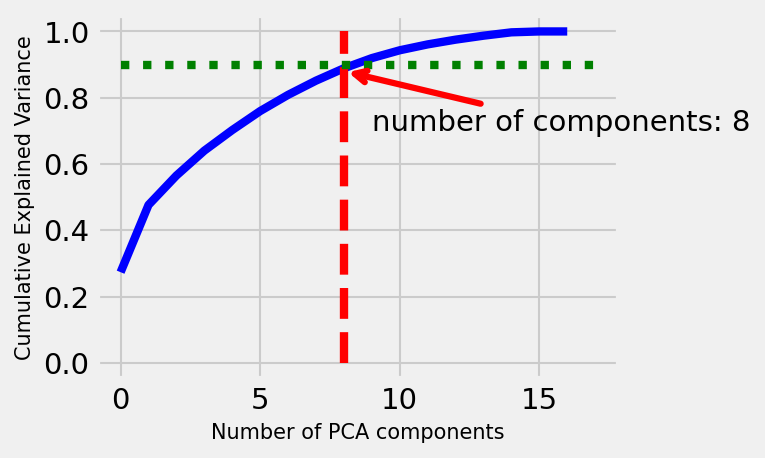

In [45]:
# Grid plot for PCA with 3 dimension
fig = plt.figure (figsize = (4 , 3) , dpi = 150)

plt.plot (np.cumsum (pca.explained_variance_ratio_) , color = "blue")
plt.vlines (x = 8 , ymax = 1 , ymin = 0 , colors = "red", linestyles = '--')
plt.hlines (y = 0.9 , xmax = 17 , xmin = 0 , colors = "green" , linestyles = ":")

plt.xlabel ('Number of PCA components' , fontsize = 10)
plt.ylabel ('Cumulative Explained Variance' , fontsize = 10)

plt.grid (True)
plt.annotate ('number of components: 8',
             xy = (8 , 0.88),
             xytext = (9 , 0.7),
             arrowprops = dict (arrowstyle = '->' , connectionstyle = 'arc3' , color = 'red', lw = 3))

PCA with 8 dimensions

In [46]:
# PCA with dimension
pca_8 = PCA (n_components = 8).fit (X)

pca_8 = pca_8.fit_transform (X)

pca_8_df = pd.DataFrame (pca_8)
pca_8_df.columns = ["PC1" , "PC2" , "PC3", "PC4", "PC5", "PC6" , "PC7" , "PC8"]
pca_8_df.head()

pca_8_df ['Cluster']= df2 ["Labels"]
pca_8_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.686520 -1.088974  0.459314  0.697222  0.064202  0.082937  0.822029   
1    -1.150334  2.487790  0.622042 -0.097306  0.713320 -1.065487 -0.344879   
2     0.961781 -0.393432  0.039577  1.276283 -2.107230 -0.412936 -1.592978   
3    -0.913554 -0.036995  1.533938  1.058203  0.214211 -0.196015 -0.224845   
4    -1.600294 -0.699565  0.295257  1.045982 -0.426078  0.077209  0.706174   
...        ...       ...       ...       ...       ...       ...       ...   
8871 -1.128798 -0.870673  1.274826 -1.028105 -0.863815  3.285747 -1.732614   
8872 -0.357144 -2.022940 -0.903782 -2.772226  0.019370  2.684563 -1.538019   
8873 -0.927315 -1.820645 -0.383916 -2.321573  0.116568  2.992822 -1.405571   
8874 -2.343425 -0.678619  1.033559 -1.812556 -0.181767  3.194405 -0.957038   
8875 -0.573038 -0.421659  1.103764 -1.897345 -1.588495  3.613670 -1.481022   

           PC8  Cluster  
0    -0.057782      0.0  
1     0.126617      1.0  
2    -0.094950      1.0  
3    -0.775408      1.0  
4     0.184979      0.0  
...        ...      ...  
8871 -0.572135      0.0  
8872  0.196791      0.0  
8873 -0.334831      0.0  
8874  0.131492      0.0  
8875 -0.307492      0.0  

[8876 rows x 9 columns]

5.3. KMeans Clustering using PCA

PCA with 8 dimensions

In [47]:
# K-means clustering using PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
X = scaler.fit_transform (df1)

pca = PCA (n_components = 8)
pca.fit (X)
pca_transform = pca.transform (X)
selected_pca = pca_transform [:,:8]

In [62]:
# K-Means clustering and PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

Inertia = []
silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans (n_clusters = k, **kmeans_set)
    kmeans.fit (selected_pca)

    score = silhouette_score (selected_pca, kmeans.labels_)
    silhouette_coefficients.append (score)

    Inertia.append (kmeans.inertia_)

# Calculation of scores
from sklearn import metrics

labels = k_means.labels_
print ("Silhouette score is :" , metrics.silhouette_score (selected_pca, labels, metric = 'euclidean'))
print ("Calinski-Harabasz score is :" , metrics.calinski_harabasz_score (selected_pca, labels))
print ("Davies-Bouldin score is :" , metrics.davies_bouldin_score(selected_pca, labels))

Silhouette score is : 0.2720240569945102
Calinski-Harabasz score is : 1971.877420499479
Davies-Bouldin score is : 1.415002619667731


In [49]:
from kneed import KneeLocator
k1 = KneeLocator (range (1, 11), List, curve = "convex", direction = "decreasing")
k1.elbow

4

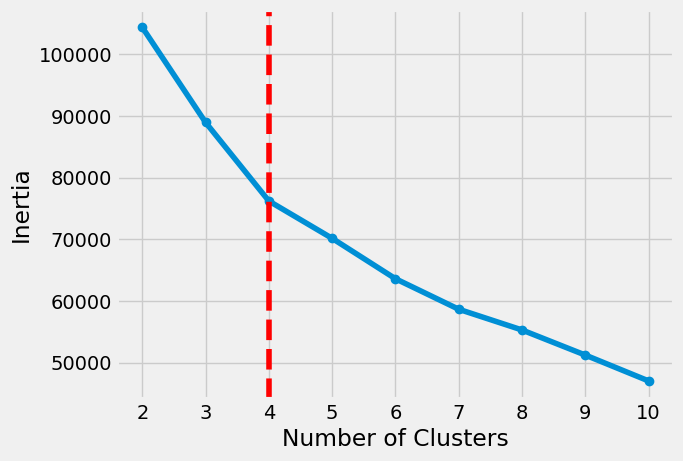

In [50]:
plt.style.use ("fivethirtyeight")
plt.plot (range (2,11), Inertia , marker = 'o')
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
# axvline = ax vertical line
plt.axvline (x = k1.elbow, color = "red", label = "axvline - full height", linewidth = 4, linestyle ="--")
plt.show ()

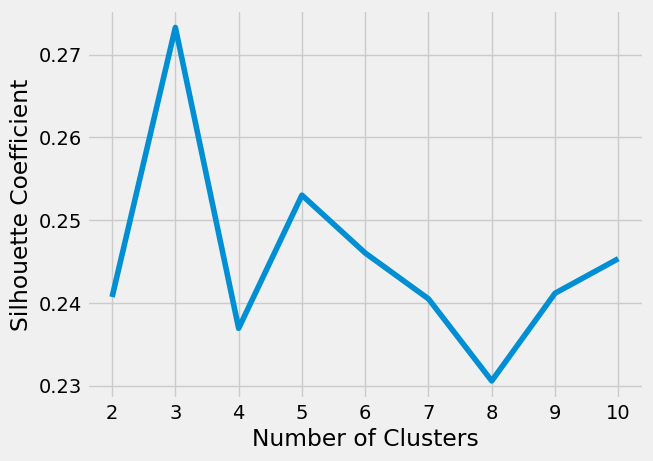

In [51]:
# Plotting the results:
plt.style.use ("fivethirtyeight")
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.show ()

# Conclusion

In this project, I performed K-Means clustering, PCA, and K-Means clustering using PCA.
* In K-means I came up with 3 clusters.
* In PCA I came up with 8 dimension.
* In K-means clustering using PCA, I used 8 components, and came up with 3 clusters. The result of K-Means clustering using PCA is the same as K-Means clustering. So, I did not repeat them.

After performing the models, the customers sgment into 3 groups:
* Group 0: These group of customers are not spenders.
* Group 1: These group of customers are unable to spenend as they do not have money.
* Group 2: These group of customers are spenders.

A credit card company, can use these informations to define a marketing strategy. People in Group 2 clearly have the capacity to spend their money. Therefore, a credit card company can use their spending habits to optimize the strategies to get them to spend even more.

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
